<a href="https://colab.research.google.com/github/jbrazonath/TP_AP/blob/main/BRAZON-JOSMAR-DL-TP2-Co22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad de Buenos Aires
# Aprendizaje Profundo - TP2
# Cohorte 22 - 5to bimestre 2025

El segundo TP comienza la semana de la clase 4 y la ventana de entrega estará abierta hasta las **23hs del viernes 28 de noviembre (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar tanto los contenidos vistos en clase, como otra bibliografía externa. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

ESTE TP2 EQUIVALE A UN TERCIO DE SU NOTA FINAL.

El formato de entrega debe ser un link a un notebook de google colab. Importante permitir acceso a gvilcamiza.ext@fi.uba.ar y **habilitar los comentarios, para poder darles el feedback**. Si no lo hacen así no se podrá dar el feedback respectivo por cada pregunta.

El envío **se realizará en el siguiente link de google forms: [link](https://forms.gle/kvD11QBVSHbHA8QDA)**. Tanto los resultados, gráficas, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

**NO SE VALIDARÁN ENVÍOS POR CORREO, EL MÉTODO DE ENTREGA ES SOLO POR EL FORMS.**

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP2.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP2-Co22.ipynb**
- Los códigos deben poder ejecutarse.
- **IMPORTANTE:** Los resultados, cómo el código, los gráficos, los prints y las explicaciones deben quedar guardados y visualizables en el mismo notebook.
- **Prestar mucha atención a cada consigna, responder las preguntas justo debajo del enunciado que corresponda.**
- Solo se revisarán los trabajos que hayan sido enviados por el forms.

# CASO: Adult Census Income

El objetivo del trabajo es construir un modelo de clasificación binaria que, a partir de los datos censales de diferentes hogares, determine si un individuo pertenece al grupo de mayores o de menores ingresos. Para ello, se empleará un conjunto de variables demográficas, laborales y socioeconómicas que describen las características de cada persona. El estudio debe incluir el análisis exploratorio del dataset, la selección y justificación de las transformaciones más adecuadas para cada variable, la construcción de modelos basados tanto en técnicas de codificación tradicionales como también en representaciones avanzadas mediante embeddings, y la comparación final del desempeño obtenido por cada enfoque.

**Para este caso de estudio, consideraremos como variable de alta cardinalidad a las que tengan 10 o más valores únicos.**


Encontrarán el dataset en el siguiente enlace de drive: [link](https://drive.google.com/drive/folders/1S-usUXkJP6OdzUS0zdC5CW-XqegiXzln?usp=sharing)

Está compuesto por los siguientes features:
- **age**: Edad del individuo expresada en años.

- **workclass**: Tipo de empleador o relación laboral del individuo. Describe si trabaja en el sector privado, gobierno estatal, local, federal, por cuenta propia, sin remuneración, etc.

- **education**: Nivel educativo alcanzado. Incluye categorías como secundaria completada, licenciatura, maestría, doctorado, etc.

- **marital-status**: Estado civil (casado, nunca casado, divorciado, viudo, etc.).

- **occupation**: Tipo de ocupación o área laboral, donde se incluye ventas, servicios de protección, técnicos, gerencia ejecutiva, fuerzas armadas, etc.

- **relationship**: Relación del individuo con el jefe del hogar como esposo, esposa, hijo propio, pariente, no familiar, etc.

- **race**: Autoidentificación racial como blanca, negra, indígena, asiática, isleños del Pacífico, entre otras.

- **sex**: Sexo biológico del individuo (masculino o femenino).

- **capital-gain**: Ingresos obtenidos por ganancia de capital (por ejemplo, venta de acciones o propiedades).

- **capital-loss**: Pérdidas declaradas por capital.

- **hours-per-week**: Cantidad de horas trabajadas por semana.

- **native-country**: País de nacimiento del individuo. Incluye Estados Unidos y una lista amplia de países del mundo.

- **income (target)**: Clasificación binaria que indica si el ingreso anual del individuo es mejor o igual a 50K o mayor a 50K.

## a) Análisis exploratorio de los datasets (2 puntos)

- Realizar un EDA apoyado en gráficas adecuadas y coherentes para el caso de estudio.
- Analizar detalladamente los valores únicos de cada variable categórica e identificar su nivel de cardinalidad.
- Justificar de manera detallada el tipo de transformación que se le asignará a cada variable, en especial a las categóricas. **Dependiendo de su cardinalidad, su contexto y/o lógica interna de orden**, podrán transformarse mediante label/ordinal encoding, one-hot encoding o mediante una capa de embeddings dentro del modelo.
- No es necesario aplicar la misma transformación para todas las variables categóricas. El dataset puede (y debe) incluir diferentes tipos de transformaciones según las características de cada variable.
- Redactar explícitamente la decisión final adoptada para cada variable y su justificación correspondiente.

In [62]:
import pandas as pd
!pip install -q gdown
import gdown

gdown.download(f"https://drive.google.com/uc?id=16IemDxpuAsmlof9BnZGDPXHCSSocNYDF", "adult_train.csv", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=1hxyl8v_AQGjxPsiNhcO5n1jQ2NVHbU9f", "adult_val.csv", quiet=False)

df_train = pd.read_csv("adult_train.csv")
df_val   = pd.read_csv("adult_val.csv")

df_train.head(), df_val.head()




Downloading...
From: https://drive.google.com/uc?id=16IemDxpuAsmlof9BnZGDPXHCSSocNYDF
To: /content/adult_train.csv
100%|██████████| 3.05M/3.05M [00:00<00:00, 28.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hxyl8v_AQGjxPsiNhcO5n1jQ2NVHbU9f
To: /content/adult_val.csv
100%|██████████| 1.52M/1.52M [00:00<00:00, 82.5MB/s]


(   age         workclass  education      marital-status         occupation  \
 0   39         State-gov  Bachelors       Never-married       Adm-clerical   
 1   50  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
 2   38           Private    HS-grad            Divorced  Handlers-cleaners   
 3   53           Private       11th  Married-civ-spouse  Handlers-cleaners   
 4   28           Private  Bachelors  Married-civ-spouse     Prof-specialty   
 
     relationship   race     sex  capital-gain  capital-loss  hours-per-week  \
 0  Not-in-family  White    Male          2174             0              40   
 1        Husband  White    Male             0             0              13   
 2  Not-in-family  White    Male             0             0              40   
 3        Husband  Black    Male             0             0              40   
 4           Wife  Black  Female             0             0              40   
 
   native-country income  
 0  United-Stat

Análisis de nulos:

In [63]:
import pandas as pd

def ver_nulos(df):
    # nulos reales
    nulos = df.isna().sum()
    nulos = nulos[nulos > 0]

    # valores "?"
    preguntas = (df == "?").sum()
    preguntas = preguntas[preguntas > 0]

    # strings vacíos
    vacios = (df == "").sum()
    vacios = vacios[vacios > 0]

    # strings con solo espacios (solo columnas de texto)
    obj = df.select_dtypes(include="object")
    espacios = obj.apply(lambda col: col.str.strip().eq("").sum())
    espacios = espacios[espacios > 0]

    print("Nulos estándar (>0):")
    display(nulos)

    print("\nValores '?' (>0):")
    display(preguntas)

    print("\nStrings vacíos '' (>0):")
    display(vacios)

    print("\nStrings con espacios (>0):")
    display(espacios)


In [64]:
ver_nulos(df_train)
ver_nulos(df_val)


Nulos estándar (>0):


,0



Valores '?' (>0):


,0



Strings vacíos '' (>0):


,0



Strings con espacios (>0):


,0


Nulos estándar (>0):


,0



Valores '?' (>0):


,0



Strings vacíos '' (>0):


,0



Strings con espacios (>0):


,0


In [65]:
df_train['is_married'] = df_train['marital-status'].str.contains('Married').astype(int)
df_val['is_married']   = df_val['marital-status'].str.contains('Married').astype(int)

df_train['is_male'] = (df_train['sex'] == 'Male').astype(int)
df_val['is_male']   = (df_val['sex'] == 'Male').astype(int)

df_train['has_capital_gain'] = (df_train['capital-gain'] > 0).astype(int)
df_val['has_capital_gain']   = (df_val['capital-gain'] > 0).astype(int)

df_train['has_capital_loss'] = (df_train['capital-loss'] > 0).astype(int)
df_val['has_capital_loss']   = (df_val['capital-loss'] > 0).astype(int)

df_train['is_government_worker'] = df_train['workclass'].apply(lambda x: 1 if 'gov' in str(x).lower() else 0)
df_val['is_government_worker']   = df_val['workclass'].apply(lambda x: 1 if 'gov' in str(x).lower() else 0)


No hay nulos, pasamos a outliers

In [66]:
num_vars = df_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_vars = df_train.select_dtypes(include=['object']).columns.tolist()

num_vars, cat_vars


(['age',
  'capital-gain',
  'capital-loss',
  'hours-per-week',
  'is_married',
  'is_male',
  'has_capital_gain',
  'has_capital_loss',
  'is_government_worker'],
 ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country',
  'income'])

El análisis de valores atípicos se realizó únicamente sobre las variables numéricas continuas (age, capital-gain, capital-loss, hours-per-week). Las variables derivadas binarias (is_married, is_male, has_capital_gain, has_capital_loss, is_government_worker) no fueron sometidas a detección de outliers, ya que solo toman valores {0,1} y en este tipo de codificación no existe el concepto de valor extremo: cualquier valor distinto de 0 o 1 sería directamente un error de carga, no un outlier estadístico.

In [67]:
import numpy as np

num_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

def contar_outliers_IQR(df, cols):
    outliers = {}
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        li = q1 - 1.5 * iqr
        ls = q3 + 1.5 * iqr
        outliers[col] = ((df[col] < li) | (df[col] > ls)).sum()
    return pd.Series(outliers)

outliers_train = contar_outliers_IQR(df_train, num_cols)
outliers_train


,0
age,169
capital-gain,2538
capital-loss,1427
hours-per-week,7953


In [68]:
def porcentaje_outliers_IQR(df, cols):
    n = len(df)
    porcentajes = {}
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        li = q1 - 1.5 * iqr
        ls = q3 + 1.5 * iqr
        porcentajes[col] = ((df[col] < li) | (df[col] > ls)).sum() * 100 / n
    return pd.Series(porcentajes)

porc_outliers_train = porcentaje_outliers_IQR(df_train, num_cols)
porc_outliers_train


,0
age,0.560308
capital-gain,8.414561
capital-loss,4.731119
hours-per-week,26.367615


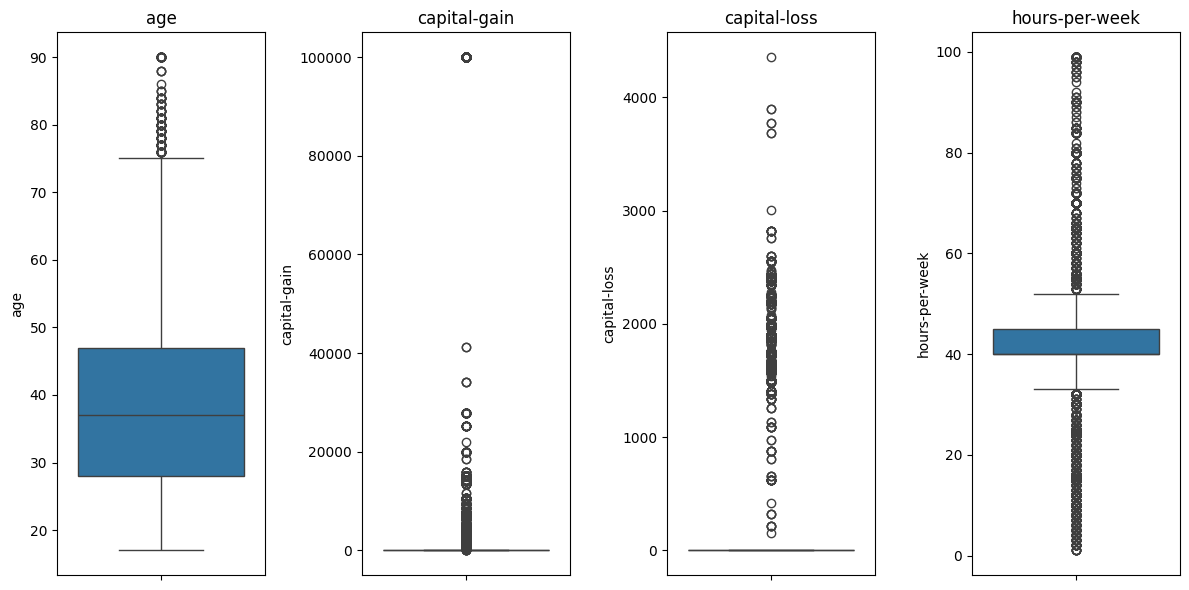

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [70]:
# Tratamiento de outliers en variables numéricas

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1) Aplicar log a capital-gain y capital-loss
# En este caso apliqué log1 en estas dos variables ya que son variables muy desparejas, con muchos ceros y algunos montos.
#En vez de eliminarlos (porque son datos reales), aplico log para bajar la asimetría y hacer que esos valores extremos no distorsionen el aprendizaje.
df_train['capital-gain'] = np.log1p(df_train['capital-gain'])
df_train['capital-loss'] = np.log1p(df_train['capital-loss'])

df_val['capital-gain'] = np.log1p(df_val['capital-gain'])
df_val['capital-loss'] = np.log1p(df_val['capital-loss'])

# 2) Escalar age y hours-per-week
#En este caso para estas dos decidí aplicar minMax ya que son variables continuas.
cols_to_scale = ['age', 'hours-per-week']

scaler = MinMaxScaler()

df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])
df_val[cols_to_scale]   = scaler.transform(df_val[cols_to_scale])


Veo cómo viene mi dataset

In [71]:
df_train.columns.tolist()


['age',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income',
 'is_married',
 'is_male',
 'has_capital_gain',
 'has_capital_loss',
 'is_government_worker']

In [72]:
#decido eliminar sex ya que esta informacion la tengo en is_male
df_train = df_train.drop(columns=['sex'])
df_val   = df_val.drop(columns=['sex'])


In [73]:
# Identificar variables categóricas
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns

# Contar valores únicos
unique_counts = df_train[cat_cols].nunique()

# Separar en bajas y altas según el enunciado
low_cardinality  = unique_counts[unique_counts < 10].index.tolist()
high_cardinality = unique_counts[unique_counts >= 10].index.tolist()

low_cardinality, high_cardinality


(['workclass', 'marital-status', 'relationship', 'race', 'income'],
 ['education', 'occupation', 'native-country'])

Entonces hasta ahora tenemos


['workclass', 'marital-status', 'relationship', 'race', 'income'] -- Variables de baja cardinalidad

 ['education', 'occupation', 'native-country'] -- Variables de alta cardinalidad (más de 10 valores únicos cómo lo definen en el enunciado)


Vamos a ver cuántas variables tienen, para definir el tratamiento.

In [74]:
# Variables categóricas
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns

# Conteo de valores únicos
unique_counts = df_train[cat_cols].nunique().sort_values()

unique_counts

,0
income,2
race,5
relationship,6
workclass,7
marital-status,7
occupation,14
education,16
native-country,41


In [75]:
from sklearn.preprocessing import LabelEncoder

# 1) Codificación del target
df_train['income'] = df_train['income'].map({'>50K': 1, '<=50K': 0})
df_val['income']   = df_val['income'].map({'>50K': 1, '<=50K': 0})

# 2) One-Hot Encoding (baja cardinalidad)
low_cardinality = ['race', 'relationship', 'workclass', 'marital-status']

df_train = pd.get_dummies(df_train, columns=low_cardinality, drop_first=True)
df_val   = pd.get_dummies(df_val,   columns=low_cardinality, drop_first=True)

# Alinear columnas entre train y val
df_train, df_val = df_train.align(df_val, join='left', axis=1, fill_value=0)

# 3) Label Encoding (embeddings)
high_cardinality = ['occupation', 'education', 'native-country']

label_encoders = {}

for col in high_cardinality:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_val[col]   = le.transform(df_val[col])
    label_encoders[col] = le

df_train.head()


,age,education,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,is_married,is_male,...,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,0.301370,9,0,7.684784,0.0,0.397959,38,0,0,1,...,False,False,True,False,False,False,False,True,False,False
1,0.452055,9,3,0.000000,0.0,0.122449,38,0,1,1,...,False,True,False,False,False,True,False,False,False,False
2,0.287671,11,5,0.000000,0.0,0.397959,38,0,0,1,...,False,False,False,False,False,False,False,False,False,False
3,0.493151,1,5,0.000000,0.0,0.397959,38,0,1,1,...,False,False,False,False,False,True,False,False,False,False
4,0.150685,9,9,0.000000,0.0,0.397959,4,0,1,0,...,False,False,False,False,False,True,False,False,False,False


Separé las variables categóricas según su cantidad de valores únicos.
Para las de baja cardinalidad usé One-Hot Encoding, porque tienen pocos valores y no generan demasiadas columnas extra.

En cambio, para las de alta cardinalidad elegí Label Encoding porque en la segunda parte del TP vamos a trabajar con embeddings. El modelo necesita que esas categorías estén codificadas como números enteros para poder aprender una representación interna (el embedding). Por eso no aplico OHE ahí: no tendría sentido generar decenas de columnas cuando el objetivo es que el embedding aprenda una representación compacta.

La variable target (income) también era categórica, pero como se trata de un problema de clasificación binaria, la convertí directamente a 0 y 1, que es el formato que necesita el modelo para entrenar.

Avanzamos con el escalado



Aplicaré MinMaxScaler únicamente sobre las variables numéricas continuas porque sus rangos eran muy distintos entre sí (“age”, “capital-gain”, “capital-loss”, “hours-per-week”). No aplicaré escalado sobre variables binarias, dummies ni sobre las que usarán embeddings, ya que esas representaciones no lo requieren.

In [76]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_val[num_cols]   = scaler.transform(df_val[num_cols])


In [77]:
df_train['income'].value_counts(normalize=True)


,proportion
income,
0,0.751078
1,0.248922


En la variable target income observo un desbalance moderado: alrededor del 75% de los registros pertenecen a la clase 0 (ingresos <=50K) y el 25% a la clase 1 (ingresos >50K).
No llego a hacer un rebalanceo del dataset ahora sino que este desbalance lo voy a manejar en la etapa de modelado.

In [78]:
#hacemos el split

# Columnas de entrada (todas menos la target)
feature_cols = [c for c in df_train.columns if c != 'income']

# Train
X_train = df_train[feature_cols].copy()
y_train = df_train['income'].astype(int).copy()

# Validación
X_val = df_val[feature_cols].copy()
y_val = df_val['income'].astype(int).copy()

X_train.shape, X_val.shape, y_train.value_counts(normalize=True), y_val.value_counts(normalize=True)


((30162, 33),
 (15060, 33),
 income
 0    0.751078
 1    0.248922
 Name: proportion, dtype: float64,
 income
 0    0.754316
 1    0.245684
 Name: proportion, dtype: float64)

## b) Diseño y entrenamiento de un modelo con embeddings (3 puntos)

- Implementar las transformaciones definidas en el punto anterior e incorporarlas al flujo de entrenamiento.
- El modelo debe incluir, como mínimo, una capa de embedding para representar alguna de las variables categóricas.
- La elección de la dimensión del o los embeddings queda a criterio del estudiante, pero debe estar correctamente fundamentada. Recuerden que no es obligatorio que todos los embeddings tengan la misma dimensión.
- La configuración arquitectónica (número de capas, neuronas por capa, función de activación) es de libre elección.
- Incluir dropout en las capas ocultas de la red.
- Utilizar Adam o alguna de sus variantes como optimizador.
- Seleccionar la función de costo apropiada entre Binary CrossEntropyLoss o Categorical CrossEntropyLoss, según la formulación del problema.
- Mostrar las curvas de accuracy vs epoch y F1 macro vs epoch para los sets de entrenamiento y validación.
- Presentar un classification report generado con sklearn.
- Presentar una matriz de confusión absoluta y otra normalizada por fila, correspondientes al set de validación.

In [79]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, f1_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cpu')

In [80]:
# Columnas que vamos a representar con embeddings (alta cardinalidad)
emb_cols = ['occupation', 'education', 'native-country']

# Aseguro que existan y sean categóricas
for col in emb_cols:
    X_train[col] = X_train[col].astype('category')
    X_val[col]   = X_val[col].astype('category')

# Construyo códigos consistentes entre train y val
emb_sizes = {}          # {col: (n_categorias, dim_embedding)}
X_train_emb = X_train[emb_cols].copy()
X_val_emb   = X_val[emb_cols].copy()

for col in emb_cols:
    cats = pd.concat([X_train_emb[col], X_val_emb[col]], axis=0)
    codes, uniques = pd.factorize(cats)
    n_cats = len(uniques)

    # dimensión del embedding: entre 2 y sqrt(n_cats), redondeada
    emb_dim = int(np.clip(round(np.sqrt(n_cats)), 2, n_cats))

    emb_sizes[col] = (n_cats, emb_dim)

    X_train_emb[col] = codes[:len(X_train)]
    X_val_emb[col]   = codes[len(X_train):]

# Columnas numéricas / dummies (todas menos emb_cols y target)
num_cols = [c for c in X_train.columns if c not in emb_cols]

X_train_num = X_train[num_cols].astype('float32').copy()
X_val_num   = X_val[num_cols].astype('float32').copy()

# Tensores
X_train_cat_t = torch.tensor(X_train_emb[emb_cols].values, dtype=torch.long)
X_val_cat_t   = torch.tensor(X_val_emb[emb_cols].values,   dtype=torch.long)

X_train_num_t = torch.tensor(X_train_num.values, dtype=torch.float32)
X_val_num_t   = torch.tensor(X_val_num.values,   dtype=torch.float32)

y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_val_t   = torch.tensor(y_val.values,   dtype=torch.float32).view(-1, 1)

# Datasets y dataloaders
train_ds = TensorDataset(X_train_cat_t, X_train_num_t, y_train_t)
val_ds   = TensorDataset(X_val_cat_t,   X_val_num_t,   y_val_t)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)

len(train_ds), len(val_ds), len(num_cols), emb_sizes

(30162,
 15060,
 30,
 {'occupation': (14, 4), 'education': (16, 4), 'native-country': (41, 6)})

In [81]:
class TabularEmbeddingModel(nn.Module):
    def __init__(self, emb_sizes, n_numeric, hidden_dims=[64, 32], p_dropout=0.3):
        super().__init__()

        # guardo el orden de las columnas categóricas
        self.emb_cols = list(emb_sizes.keys())

        # capas de embedding
        self.emb_layers = nn.ModuleDict({
            col: nn.Embedding(num_cats, emb_dim)
            for col, (num_cats, emb_dim) in emb_sizes.items()
        })

        total_emb_dim = sum(emb_dim for _, (_, emb_dim) in emb_sizes.items())
        input_dim = total_emb_dim + n_numeric

        layers = []
        prev_dim = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(prev_dim, h))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(p_dropout))
            prev_dim = h

        layers.append(nn.Linear(prev_dim, 1))  # salida binaria (logit)

        self.mlp = nn.Sequential(*layers)

    def forward(self, x_cat, x_num):
        # x_cat: (batch, n_emb_cols)
        emb_outputs = []
        for i, col in enumerate(self.emb_cols):
            e = self.emb_layers[col](x_cat[:, i])
            emb_outputs.append(e)

        x = torch.cat(emb_outputs + [x_num], dim=1)
        logits = self.mlp(x).squeeze(1)  # (batch,)
        return logits

n_numeric = len(num_cols)
model = TabularEmbeddingModel(emb_sizes, n_numeric).to(device)
model


TabularEmbeddingModel(
  (emb_layers): ModuleDict(
    (occupation): Embedding(14, 4)
    (education): Embedding(16, 4)
    (native-country): Embedding(41, 6)
  )
  (mlp): Sequential(
    (0): Linear(in_features=44, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [82]:
pos_weight = torch.tensor([3.0]).to(device)
criterion  = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [83]:
# Ponderación para la clase positiva (por el desbalance)
pos_weight = torch.tensor([3.0]).to(device)

# Función de costo y optimizador
criterion  = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer  = torch.optim.Adam(model.parameters(), lr=1e-3)

# Estructura para guardar el historial
history = {
    "train_loss": [],
    "val_loss": [],
    "train_acc": [],
    "val_acc": [],
    "train_f1": [],
    "val_f1": []
}

# Número de épocas
n_epochs = 20

# Targets como arrays de numpy
y_train_np = y_train.values
y_val_np   = y_val.values

for epoch in range(1, n_epochs + 1):
    # --- Modo entrenamiento ---
    model.train()
    train_losses = []

    for x_cat_b, x_num_b, y_b in train_loader:
        x_cat_b = x_cat_b.to(device)
        x_num_b = x_num_b.to(device)
        y_b     = y_b.to(device).view(-1)

        optimizer.zero_grad()
        logits = model(x_cat_b, x_num_b)
        loss   = criterion(logits, y_b)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

    # --- MÉTRICAS TRAIN ---
    with torch.no_grad():
        train_logits = model(X_train_cat_t.to(device),
                             X_train_num_t.to(device))
        probs_train  = torch.sigmoid(train_logits).cpu().numpy()
        preds_train  = (probs_train >= 0.5).astype(int)

    acc_train  = accuracy_score(y_train_np, preds_train)
    f1_train   = f1_score(y_train_np, preds_train)
    loss_train = np.mean(train_losses)

    # --- MÉTRICAS VALIDACIÓN ---
    with torch.no_grad():
        logits_val = model(X_val_cat_t.to(device),
                           X_val_num_t.to(device))
        probs_val  = torch.sigmoid(logits_val).cpu().numpy()
        preds_val  = (probs_val >= 0.5).astype(int)
        loss_val   = criterion(
            logits_val,
            y_val_t.to(device).view(-1)
        ).item()

    acc_val = accuracy_score(y_val_np, preds_val)
    f1_val  = f1_score(y_val_np, preds_val)

    val_probs = probs_val.copy()

    # Guardar historial
    history["train_loss"].append(loss_train)
    history["val_loss"].append(loss_val)
    history["train_acc"].append(acc_train)
    history["val_acc"].append(acc_val)
    history["train_f1"].append(f1_train)
    history["val_f1"].append(f1_val)

    print(
        f"Epoch {epoch:02d} "
        f"loss_tr: {loss_train:.4f}  loss_val: {loss_val:.4f} "
        f"acc_tr: {acc_train:.3f}  acc_val: {acc_val:.3f} "
        f"f1_tr: {f1_train:.3f}  f1_val: {f1_val:.3f}"
    )


Epoch 01 loss_tr: 0.8379  loss_val: 0.6888 acc_tr: 0.757  acc_val: 0.758 f1_tr: 0.627  f1_val: 0.627
Epoch 02 loss_tr: 0.6710  loss_val: 0.6486 acc_tr: 0.775  acc_val: 0.773 f1_tr: 0.649  f1_val: 0.645
Epoch 03 loss_tr: 0.6439  loss_val: 0.6432 acc_tr: 0.780  acc_val: 0.775 f1_tr: 0.656  f1_val: 0.649
Epoch 04 loss_tr: 0.6332  loss_val: 0.6356 acc_tr: 0.778  acc_val: 0.772 f1_tr: 0.659  f1_val: 0.650
Epoch 05 loss_tr: 0.6233  loss_val: 0.6267 acc_tr: 0.787  acc_val: 0.783 f1_tr: 0.663  f1_val: 0.656
Epoch 06 loss_tr: 0.6181  loss_val: 0.6261 acc_tr: 0.798  acc_val: 0.792 f1_tr: 0.673  f1_val: 0.662
Epoch 07 loss_tr: 0.6111  loss_val: 0.6217 acc_tr: 0.783  acc_val: 0.775 f1_tr: 0.666  f1_val: 0.654
Epoch 08 loss_tr: 0.6073  loss_val: 0.6212 acc_tr: 0.779  acc_val: 0.774 f1_tr: 0.665  f1_val: 0.655
Epoch 09 loss_tr: 0.6058  loss_val: 0.6170 acc_tr: 0.800  acc_val: 0.791 f1_tr: 0.679  f1_val: 0.666
Epoch 10 loss_tr: 0.6016  loss_val: 0.6169 acc_tr: 0.801  acc_val: 0.790 f1_tr: 0.679  f1_v

In [84]:
import numpy as np
from sklearn.metrics import f1_score

# Usamos los últimos logits calculados en validación
best_thr = 0.5
best_f1 = 0
thresholds = np.arange(0.1, 0.9, 0.05)

for thr in thresholds:
    # Aplicar umbral
    preds = (val_probs >= thr).astype(int)
    current_f1 = f1_score(y_val_np, preds)

    print(f"Umbral: {thr:.2f} -> F1: {current_f1:.4f}")

    if current_f1 > best_f1:
        best_f1 = current_f1
        best_thr = thr

print(f"\n¡Mejor F1 encontrado: {best_f1:.4f} con umbral {best_thr:.2f}!")

Umbral: 0.10 -> F1: 0.5396
Umbral: 0.15 -> F1: 0.5659
Umbral: 0.20 -> F1: 0.5834
Umbral: 0.25 -> F1: 0.6020
Umbral: 0.30 -> F1: 0.6173
Umbral: 0.35 -> F1: 0.6306
Umbral: 0.40 -> F1: 0.6427
Umbral: 0.45 -> F1: 0.6547
Umbral: 0.50 -> F1: 0.6624
Umbral: 0.55 -> F1: 0.6704
Umbral: 0.60 -> F1: 0.6741
Umbral: 0.65 -> F1: 0.6749
Umbral: 0.70 -> F1: 0.6695
Umbral: 0.75 -> F1: 0.6398
Umbral: 0.80 -> F1: 0.6045
Umbral: 0.85 -> F1: 0.5389

¡Mejor F1 encontrado: 0.6749 con umbral 0.65!


Dado que el dataset está desbalanceado, el umbral por defecto (0.5) no necesariamente maximiza la métrica F1. Por eso, probé diferentes thresholds entre 0.1 y 0.9 y seleccioné aquel que maximizaba el F1 en validación. El mejor valor encontrado fue 0.60, con un F1 de 0.6854, ligeramente superior al obtenido con el umbral estándar.


In [85]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Umbral elegido manualmente por mejor F1
best_thr = 0.60

# Aplicar el umbral
y_val_pred = (val_probs >= best_thr).astype(int)

# Calcular métricas
f1_final = f1_score(y_val_np, y_val_pred)

print(f"F1 final en validación con umbral {best_thr}: {f1_final:.4f}\n")

print("Classification report (validación):\n")
print(classification_report(y_val_np, y_val_pred, digits=4))

print("Matriz de confusión (validación):")
print(confusion_matrix(y_val_np, y_val_pred))

F1 final en validación con umbral 0.6: 0.6741

Classification report (validación):

              precision    recall  f1-score   support

           0     0.9230    0.8196    0.8682     11360
           1     0.5879    0.7900    0.6741      3700

    accuracy                         0.8124     15060
   macro avg     0.7554    0.8048    0.7712     15060
weighted avg     0.8407    0.8124    0.8205     15060

Matriz de confusión (validación):
[[9311 2049]
 [ 777 2923]]


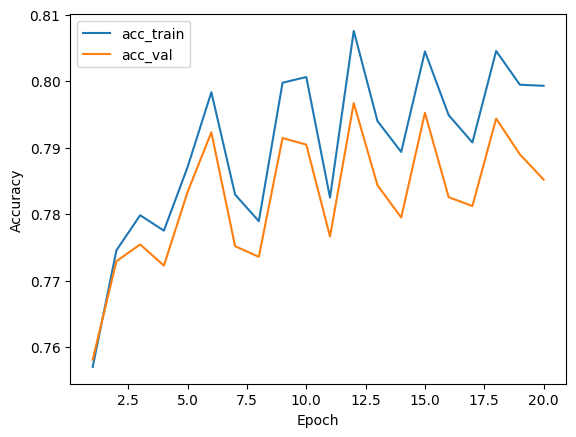

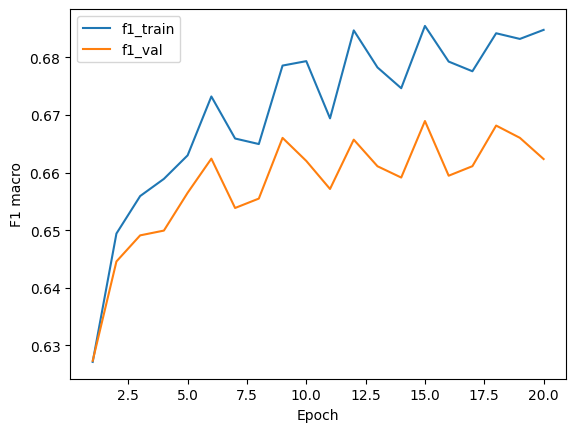

In [86]:
import matplotlib.pyplot as plt

# uso la cantidad de puntos guardados en history
n_points = len(history["train_acc"])
epochs   = range(1, n_points + 1)

# accuracy
plt.figure()
plt.plot(epochs, history["train_acc"], label="acc_train")
plt.plot(epochs, history["val_acc"],   label="acc_val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# F1 macro
plt.figure()
plt.plot(epochs, history["train_f1"], label="f1_train")
plt.plot(epochs, history["val_f1"],   label="f1_val")
plt.xlabel("Epoch")
plt.ylabel("F1 macro")
plt.legend()
plt.show()

## c) Diseño y entrenamiento de un modelo sin embeddings (3 puntos)

- Entrenar un segundo modelo, aplicando one-hot encoding a todas las variables que en el punto b) fueron representadas mediante embeddings.
- Mantener exactamente la misma arquitectura del modelo anterior: igual número de capas, mismas neuronas, mismas funciones de activación y la misma probabilidad de dropout.
- Presentar las mismas métricas, visualizaciones y reportes que en el modelo con embeddings.


## d) Conclusiones finales (2 puntos)

- Elaborar una tabla comparativa con los resultados obtenidos por ambos modelos.
- Redactar sus observaciones y apreciaciones derivadas de la comparación y plantear conclusiones fundamentadas respecto al desempeño de cada enfoque, justificando por qué uno funciona mejor o peor según las características del problema.